In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

In [2]:
import statsmodels

In [3]:
def r2_to_pct(df, r2_col, path_to_csv, r2_col_2=None):
    """
    Transform r2_col from df into percentage
    and save as csv in path_to_csv
    """
    df[r2_col] = df[r2_col]*100
    if r2_col_2 != None:
        df[r2_col_2] = df[r2_col_2]*100
    df.to_csv(path_to_csv, index=True)
    

In [4]:
df = pd.read_excel('bvsp_monthly_update.xlsx')
df = df.rename(columns={'Date':'date','.BVSP':'bvsp','.BVSP (Volume)':'volume'})
df = df.drop(columns=['.BVSP.1','.BVSP.2','.BVSP.3'])

# removing first line (nan value) and early years with index value = 0 and unnecessary column names
df = df[df['bvsp'] != 0]
df = df.iloc[1:]

# first values of data set are the most recent. we will invert this time series so we have a better
# understading of some calculations applied (rolling mean, difference of the series)
df = df[::-1]

# setting data as dataframe index
df.set_index('date', inplace=True)

# values from object to float
df['bvsp'] = df['bvsp'].astype(float)
df['volume'] = df['volume'].astype(float)

df

,bvsp,volume
date,,
1990-01-01,0.01,1.584679e+13
1990-02-01,0.01,1.587528e+13
1990-03-01,0.02,8.835343e+12
1990-04-02,0.01,7.861243e+12
1990-05-01,0.02,1.258350e+13
...,...,...
2023-01-02,109733.88,2.955807e+11
2023-02-01,113429.60,2.287220e+11
2023-03-01,104933.17,3.270232e+11


In [5]:
window_sizes = [1,2,3,9,12]
for i in window_sizes:
    column_name = f"moving_average_{i}"
    df[column_name] = df['bvsp'].rolling(window=i).mean()

In [6]:
def add_column_moving_average_comparison(df, ma1, ma2, cmp_col=None):
    # ma1 and ma2 are column names (string)
    if cmp_col is None:
        cmp_col = f'cmp_{ma1}_{ma2}'
    df[cmp_col] = pd.NA
    df.loc[df[ma1] >= df[ma2], cmp_col] = 1
    df.loc[df[ma1] < df[ma2], cmp_col] = 0


add_column_moving_average_comparison(df, 'moving_average_1', 'moving_average_9')
add_column_moving_average_comparison(df, 'moving_average_1', 'moving_average_12')
add_column_moving_average_comparison(df, 'moving_average_2', 'moving_average_9')
add_column_moving_average_comparison(df, 'moving_average_2', 'moving_average_12')
add_column_moving_average_comparison(df, 'moving_average_3', 'moving_average_9')
add_column_moving_average_comparison(df, 'moving_average_3', 'moving_average_12')

df

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,cmp_moving_average_2_moving_average_12,cmp_moving_average_3_moving_average_9,cmp_moving_average_3_moving_average_12
date,,,,,,,,,,,,,
1990-01-01,0.01,1.584679e+13,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-01,0.01,1.587528e+13,0.01,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-01,0.02,8.835343e+12,0.02,0.015,0.013333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-02,0.01,7.861243e+12,0.01,0.015,0.013333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-01,0.02,1.258350e+13,0.02,0.015,0.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,109733.88,2.955807e+11,109733.88,111106.280,112749.940000,108750.518889,110336.847500,1,0,1,1,1,1
2023-02-01,113429.60,2.287220e+11,113429.60,111581.740,111880.720000,109367.568889,110444.029167,1,1,1,1,1,1
2023-03-01,104933.17,3.270232e+11,104933.17,109181.385,109365.550000,108654.531111,109759.871667,0,0,1,0,1,0


In [7]:
df.head()

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,cmp_moving_average_2_moving_average_12,cmp_moving_average_3_moving_average_9,cmp_moving_average_3_moving_average_12
date,,,,,,,,,,,,,
1990-01-01,0.01,1.584679e+13,0.01,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1990-02-01,0.01,1.587528e+13,0.01,0.010,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1990-03-01,0.02,8.835343e+12,0.02,0.015,0.013333,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1990-04-02,0.01,7.861243e+12,0.01,0.015,0.013333,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1990-05-01,0.02,1.258350e+13,0.02,0.015,0.016667,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [8]:
def add_obv(df):
    copy = df
    # https://stackoverflow.com/a/66827219
    copy["OBV"] = (np.sign(copy["bvsp"].diff()) * copy["volume"]).fillna(0).cumsum()
    return copy

In [9]:
add_obv(df)

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,cmp_moving_average_2_moving_average_12,cmp_moving_average_3_moving_average_9,cmp_moving_average_3_moving_average_12,OBV
date,,,,,,,,,,,,,,
1990-01-01,0.01,1.584679e+13,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
1990-02-01,0.01,1.587528e+13,0.01,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
1990-03-01,0.02,8.835343e+12,0.02,0.015,0.013333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.835343e+12
1990-04-02,0.01,7.861243e+12,0.01,0.015,0.013333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.741001e+11
1990-05-01,0.02,1.258350e+13,0.02,0.015,0.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355760e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,109733.88,2.955807e+11,109733.88,111106.280,112749.940000,108750.518889,110336.847500,1,0,1,1,1,1,1.444460e+16
2023-02-01,113429.60,2.287220e+11,113429.60,111581.740,111880.720000,109367.568889,110444.029167,1,1,1,1,1,1,1.444483e+16
2023-03-01,104933.17,3.270232e+11,104933.17,109181.385,109365.550000,108654.531111,109759.871667,0,0,1,0,1,0,1.444450e+16


In [10]:
window_sizes = [1,2,3,9,12]
for i in window_sizes:
    column_name = f"obv_ma_{i}"
    df[column_name] = df['OBV'].rolling(window=i).mean()

add_column_moving_average_comparison(df, 'obv_ma_1', 'obv_ma_9')
add_column_moving_average_comparison(df, 'obv_ma_1', 'obv_ma_12')
add_column_moving_average_comparison(df, 'obv_ma_2', 'obv_ma_9')
add_column_moving_average_comparison(df, 'obv_ma_2', 'obv_ma_12')
add_column_moving_average_comparison(df, 'obv_ma_3', 'obv_ma_9')
add_column_moving_average_comparison(df, 'obv_ma_3', 'obv_ma_12')

df

In [11]:
add_column_moving_average_comparison(df, 'obv_ma_1', 'obv_ma_9')
add_column_moving_average_comparison(df, 'obv_ma_1', 'obv_ma_12')
add_column_moving_average_comparison(df, 'obv_ma_2', 'obv_ma_9')
add_column_moving_average_comparison(df, 'obv_ma_2', 'obv_ma_12')
add_column_moving_average_comparison(df, 'obv_ma_3', 'obv_ma_9')
add_column_moving_average_comparison(df, 'obv_ma_3', 'obv_ma_12')

df

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,...,obv_ma_2,obv_ma_3,obv_ma_9,obv_ma_12,cmp_obv_ma_1_obv_ma_9,cmp_obv_ma_1_obv_ma_12,cmp_obv_ma_2_obv_ma_9,cmp_obv_ma_2_obv_ma_12,cmp_obv_ma_3_obv_ma_9,cmp_obv_ma_3_obv_ma_12
date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0.01,1.584679e+13,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-01,0.01,1.587528e+13,0.01,0.010,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-01,0.02,8.835343e+12,0.02,0.015,0.013333,NaN,NaN,NaN,NaN,NaN,...,4.417672e+12,2.945114e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-02,0.01,7.861243e+12,0.01,0.015,0.013333,NaN,NaN,NaN,NaN,NaN,...,4.904722e+12,3.269814e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-01,0.02,1.258350e+13,0.02,0.015,0.016667,NaN,NaN,NaN,NaN,NaN,...,7.265850e+12,7.789014e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,109733.88,2.955807e+11,109733.88,111106.280,112749.940000,108750.518889,110336.847500,1,0,1,...,1.444475e+16,1.444490e+16,1.444450e+16,1.444438e+16,1,1,1,1,1,1
2023-02-01,113429.60,2.287220e+11,113429.60,111581.740,111880.720000,109367.568889,110444.029167,1,1,1,...,1.444471e+16,1.444477e+16,1.444460e+16,1.444447e+16,1,1,1,1,1,1
2023-03-01,104933.17,3.270232e+11,104933.17,109181.385,109365.550000,108654.531111,109759.871667,0,0,1,...,1.444467e+16,1.444464e+16,1.444463e+16,1.444451e+16,0,0,1,1,1,1


In [12]:
def mom(df, m, new_column_name):
    df[new_column_name] = df.bvsp > (df.bvsp.shift(periods=m))
    df[new_column_name] = df[new_column_name].astype(int)
    return df


In [13]:
mom(df, 9, 'mom_9')
mom(df, 12, 'mom_12')

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,...,obv_ma_9,obv_ma_12,cmp_obv_ma_1_obv_ma_9,cmp_obv_ma_1_obv_ma_12,cmp_obv_ma_2_obv_ma_9,cmp_obv_ma_2_obv_ma_12,cmp_obv_ma_3_obv_ma_9,cmp_obv_ma_3_obv_ma_12,mom_9,mom_12
date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0.01,1.584679e+13,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1990-02-01,0.01,1.587528e+13,0.01,0.010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1990-03-01,0.02,8.835343e+12,0.02,0.015,0.013333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1990-04-02,0.01,7.861243e+12,0.01,0.015,0.013333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1990-05-01,0.02,1.258350e+13,0.02,0.015,0.016667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,109733.88,2.955807e+11,109733.88,111106.280,112749.940000,108750.518889,110336.847500,1,0,1,...,1.444450e+16,1.444438e+16,1,1,1,1,1,1,0,1
2023-02-01,113429.60,2.287220e+11,113429.60,111581.740,111880.720000,109367.568889,110444.029167,1,1,1,...,1.444460e+16,1.444447e+16,1,1,1,1,1,1,1,1
2023-03-01,104933.17,3.270232e+11,104933.17,109181.385,109365.550000,108654.531111,109759.871667,0,0,1,...,1.444463e+16,1.444451e+16,0,0,1,1,1,1,0,0


In [14]:
df.to_excel('bvsp_techind.xlsx')

In [15]:
df_selic = pd.read_excel('selic_daily.xlsx')
df_selic = df_selic[1:]
df_selic['BRSELICD=CBBR'] = df_selic['BRSELICD=CBBR'].astype(float)
df_selic['BRSELICD=CBBR'] = df_selic['BRSELICD=CBBR'].map(lambda x: (1+x)**(1/12)-1)/100
df_selic
# need to be divided by 100 (it is 0.2470%)

,Date,BRSELICD=CBBR
1,2023-08-01,0.002471
2,2023-07-03,0.002507
3,2023-06-01,0.002507
4,2023-05-02,0.002507
5,2023-04-03,0.002507
...,...,...
296,1999-01-01,0.003539
297,1998-12-01,0.003275
298,1998-11-02,0.003461
299,1998-10-01,0.003697


In [16]:
df_selic = df_selic[::-1]
df_selic = df_selic.rename(columns={'Date':'date','BRSELICD=CBBR':'selic'})

In [17]:
df_selic

,date,selic
300,1998-09-01,0.003641
299,1998-10-01,0.003697
298,1998-11-02,0.003461
297,1998-12-01,0.003275
296,1999-01-01,0.003539
...,...,...
5,2023-04-03,0.002507
4,2023-05-02,0.002507
3,2023-06-01,0.002507
2,2023-07-03,0.002507


In [18]:
df_selic.set_index('date', inplace=True)

In [19]:
df_selic[df_selic.index > '2000-2-01']

,selic
date,
2000-03-01,0.002810
2000-04-03,0.002815
2000-05-01,0.002805
2000-06-01,0.002740
2000-07-03,0.002687
...,...
2023-04-03,0.002507
2023-05-02,0.002507
2023-06-01,0.002507


### Preparing df and df_selic for combining them...
We want to predict the risk premium

In [20]:
df = df[df.index >= '2001-03-01']

In [21]:
df_selic = df_selic[df_selic.index >= '2001-01-01']

In [22]:
df_selic

,selic
date,
2001-01-01,0.002607
2001-02-01,0.002608
2001-03-01,0.002653
2001-04-02,0.002680
2001-05-01,0.002712
...,...
2023-04-03,0.002507
2023-05-02,0.002507
2023-06-01,0.002507


In [23]:
df_selic.index = df_selic.index.to_period('M')

In [24]:
df.index = df.index.to_period('M')

In [25]:
df_merged = df.join(other=df_selic, how='left')

In [26]:
df_merged

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,...,obv_ma_12,cmp_obv_ma_1_obv_ma_9,cmp_obv_ma_1_obv_ma_12,cmp_obv_ma_2_obv_ma_9,cmp_obv_ma_2_obv_ma_12,cmp_obv_ma_3_obv_ma_9,cmp_obv_ma_3_obv_ma_12,mom_9,mom_12,selic
date,,,,,,,,,,,,,,,,,,,,,
2001-03,15890.65,4.452373e+12,15890.65,16780.395,16267.633333,15943.914444,15990.398333,0,0,1,...,1.437810e+16,0,0,1,0,1,0,1,0,0.002653
2001-04,14441.44,4.651415e+12,14441.44,15166.045,16000.743333,15687.770000,15708.353333,0,0,0,...,1.437650e+16,0,0,0,0,0,0,0,0,0.002680
2001-05,14877.14,5.939482e+12,14877.14,14659.290,15069.743333,15510.250000,15648.429167,0,0,0,...,1.437592e+16,1,1,0,0,0,0,0,0,0.002712
2001-06,14654.43,4.350074e+12,14654.43,14765.785,14657.670000,15209.663333,15622.353333,0,0,0,...,1.437538e+16,0,0,0,0,0,0,0,0,0.002799
2001-07,14579.30,3.623631e+12,14579.30,14616.865,14703.623333,15057.387778,15441.733333,0,0,0,...,1.437419e+16,0,0,0,0,0,0,0,0,0.002829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,109733.88,2.955807e+11,109733.88,111106.280,112749.940000,108750.518889,110336.847500,1,0,1,...,1.444438e+16,1,1,1,1,1,1,0,1,0.002507
2023-02,113429.60,2.287220e+11,113429.60,111581.740,111880.720000,109367.568889,110444.029167,1,1,1,...,1.444447e+16,1,1,1,1,1,1,1,1,0.002507
2023-03,104933.17,3.270232e+11,104933.17,109181.385,109365.550000,108654.531111,109759.871667,0,0,1,...,1.444451e+16,0,0,1,1,1,1,0,0,0.002507


In [27]:
df_merged['bvsp_returns'] = df['bvsp'].pct_change()

In [28]:
df_merged

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,...,cmp_obv_ma_1_obv_ma_9,cmp_obv_ma_1_obv_ma_12,cmp_obv_ma_2_obv_ma_9,cmp_obv_ma_2_obv_ma_12,cmp_obv_ma_3_obv_ma_9,cmp_obv_ma_3_obv_ma_12,mom_9,mom_12,selic,bvsp_returns
date,,,,,,,,,,,,,,,,,,,,,
2001-03,15890.65,4.452373e+12,15890.65,16780.395,16267.633333,15943.914444,15990.398333,0,0,1,...,0,0,1,0,1,0,1,0,0.002653,NaN
2001-04,14441.44,4.651415e+12,14441.44,15166.045,16000.743333,15687.770000,15708.353333,0,0,0,...,0,0,0,0,0,0,0,0,0.002680,-0.091199
2001-05,14877.14,5.939482e+12,14877.14,14659.290,15069.743333,15510.250000,15648.429167,0,0,0,...,1,1,0,0,0,0,0,0,0.002712,0.030170
2001-06,14654.43,4.350074e+12,14654.43,14765.785,14657.670000,15209.663333,15622.353333,0,0,0,...,0,0,0,0,0,0,0,0,0.002799,-0.014970
2001-07,14579.30,3.623631e+12,14579.30,14616.865,14703.623333,15057.387778,15441.733333,0,0,0,...,0,0,0,0,0,0,0,0,0.002829,-0.005127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,109733.88,2.955807e+11,109733.88,111106.280,112749.940000,108750.518889,110336.847500,1,0,1,...,1,1,1,1,1,1,0,1,0.002507,-0.024403
2023-02,113429.60,2.287220e+11,113429.60,111581.740,111880.720000,109367.568889,110444.029167,1,1,1,...,1,1,1,1,1,1,1,1,0.002507,0.033679
2023-03,104933.17,3.270232e+11,104933.17,109181.385,109365.550000,108654.531111,109759.871667,0,0,1,...,0,0,1,1,1,1,0,0,0.002507,-0.074905


In [29]:
df_merged['risk_premium'] = (df_merged['bvsp_returns'] - df_merged['selic']).apply(lambda x: format(x, '.8f'))

In [30]:
df_merged = df_merged.dropna()

In [31]:
import statsmodels.formula.api as smf

In [32]:
df_merged

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,...,cmp_obv_ma_1_obv_ma_12,cmp_obv_ma_2_obv_ma_9,cmp_obv_ma_2_obv_ma_12,cmp_obv_ma_3_obv_ma_9,cmp_obv_ma_3_obv_ma_12,mom_9,mom_12,selic,bvsp_returns,risk_premium
date,,,,,,,,,,,,,,,,,,,,,
2001-04,14441.44,4.651415e+12,14441.44,15166.045,16000.743333,15687.770000,15708.353333,0,0,0,...,0,0,0,0,0,0,0,0.002680,-0.091199,-0.09387919
2001-05,14877.14,5.939482e+12,14877.14,14659.290,15069.743333,15510.250000,15648.429167,0,0,0,...,1,0,0,0,0,0,0,0.002712,0.030170,0.02745848
2001-06,14654.43,4.350074e+12,14654.43,14765.785,14657.670000,15209.663333,15622.353333,0,0,0,...,0,0,0,0,0,0,0,0.002799,-0.014970,-0.01776869
2001-07,14579.30,3.623631e+12,14579.30,14616.865,14703.623333,15057.387778,15441.733333,0,0,0,...,0,0,0,0,0,0,0,0.002829,-0.005127,-0.00795603
2001-08,13757.49,3.926633e+12,13757.49,14168.395,14330.406667,14935.122222,15215.289167,0,0,0,...,0,0,0,0,0,0,0,0.002838,-0.056368,-0.05920664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,109733.88,2.955807e+11,109733.88,111106.280,112749.940000,108750.518889,110336.847500,1,0,1,...,1,1,1,1,1,0,1,0.002507,-0.024403,-0.02690985
2023-02,113429.60,2.287220e+11,113429.60,111581.740,111880.720000,109367.568889,110444.029167,1,1,1,...,1,1,1,1,1,1,1,0.002507,0.033679,0.03117193
2023-03,104933.17,3.270232e+11,104933.17,109181.385,109365.550000,108654.531111,109759.871667,0,0,1,...,0,1,1,1,1,0,0,0.002507,-0.074905,-0.07741187


In [33]:
df_merged = df_merged.astype(float)
# df_merged.dtypes

In [34]:
summary_data = pd.DataFrame()

In [35]:
df_merged.to_csv('df_merged.csv', index=False)

In [36]:
X = [x for x in df_merged.drop(columns=['risk_premium', 'bvsp','volume','selic','bvsp_returns','moving_average_1',
    'moving_average_2',
    'moving_average_3',
    'moving_average_9',
    'moving_average_12', 
    'OBV',
    'obv_ma_1',
    'obv_ma_2',
    'obv_ma_3',
    'obv_ma_9',
    'obv_ma_12']).columns]
residuals_dict = {}
for x in X:
    model = smf.ols(formula=f"risk_premium ~ {x}", data=df_merged).fit()
    # summary = model.summary()
    r_squared = model.rsquared
    intercept = model.params[1]  # Replace 'Intercept' with the actual column name
    t_values = model.tvalues[1]
    p_values = model.pvalues[1]
    residuals_dict[x] = model.resid
    # residuals.append(model.resid[1])
    stats_list = [x, r_squared, intercept, t_values, p_values]
    stats_df = pd.DataFrame(stats_list).T
    summary_data = pd.concat([summary_data, stats_df], ignore_index=True)

In [37]:
df[x]

date
2001-03    0
2001-04    0
2001-05    0
2001-06    0
2001-07    0
          ..
2023-01    1
2023-02    1
2023-03    0
2023-04    0
2023-05    0
Freq: M, Name: mom_12, Length: 267, dtype: int64

In [38]:
summary_data

,0,1,2,3,4
0,cmp_moving_average_1_moving_average_9,0.144904,0.054327,6.688598,0.0
1,cmp_moving_average_1_moving_average_12,0.110061,0.047254,5.713981,0.0
2,cmp_moving_average_2_moving_average_9,0.055548,0.034166,3.940472,0.000104
3,cmp_moving_average_2_moving_average_12,0.039813,0.028316,3.308528,0.001068
4,cmp_moving_average_3_moving_average_9,0.011092,0.015031,1.720797,0.086459
5,cmp_moving_average_3_moving_average_12,0.017961,0.019247,2.197358,0.028864
6,cmp_obv_ma_1_obv_ma_9,0.119213,0.05031,5.977626,0.0
7,cmp_obv_ma_1_obv_ma_12,0.090093,0.04436,5.112676,0.000001
8,cmp_obv_ma_2_obv_ma_9,0.032632,0.026187,2.984182,0.00311
9,cmp_obv_ma_2_obv_ma_12,0.025459,0.023886,2.626184,0.009139


In [39]:
col_name = {
    'cmp_moving_average_1_moving_average_9': 'MA(1,9)',
    'cmp_moving_average_1_moving_average_12': 'MA(1,12)',
    'cmp_moving_average_2_moving_average_9': 'MA(2,9)',
    'cmp_moving_average_2_moving_average_12': 'MA(2,12)',
    'cmp_moving_average_3_moving_average_9': 'MA(3,9)',
    'cmp_moving_average_3_moving_average_12': 'MA(3,12)',
    'cmp_obv_ma_1_obv_ma_9': 'VOL(1,9)',
    'cmp_obv_ma_1_obv_ma_12': 'VOL(1,12)',
    'cmp_obv_ma_2_obv_ma_9': 'VOL(2,9)',
    'cmp_obv_ma_2_obv_ma_12': 'VOL(2,12)',
    'cmp_obv_ma_3_obv_ma_9': 'VOL(3,9)',
    'cmp_obv_ma_3_obv_ma_12': 'VOL(3,12)',
    'mom_9': 'MOM(9)',
    'mom_12': 'MOM(12)'
}

In [40]:
summary_data.rename(columns={0: 'Indicador', 1: 'R-squared', 2: 'Coeficiente', 3: 'T-stat', 4: 'Valor-p', 5:'Residual'}, inplace=True)
summary_data.set_index('Indicador', inplace=True)
summary_data.rename(index=col_name,inplace=True)

In [41]:
summary_data['R-squared'] = summary_data['R-squared']*100

In [42]:
summary_data

,R-squared,Coeficiente,T-stat,Valor-p
Indicador,,,,
"MA(1,9)",14.490422,0.054327,6.688598,0.0
"MA(1,12)",11.00611,0.047254,5.713981,0.0
"MA(2,9)",5.554848,0.034166,3.940472,0.000104
"MA(2,12)",3.981271,0.028316,3.308528,0.001068
"MA(3,9)",1.109204,0.015031,1.720797,0.086459
"MA(3,12)",1.796083,0.019247,2.197358,0.028864
"VOL(1,9)",11.92132,0.05031,5.977626,0.0
"VOL(1,12)",9.009273,0.04436,5.112676,0.000001
"VOL(2,9)",3.263161,0.026187,2.984182,0.00311


In [43]:
summary_data.to_csv('summary_data.csv', index=True)

In [44]:
df_merged.columns

Index(['bvsp', 'volume', 'moving_average_1', 'moving_average_2',
       'moving_average_3', 'moving_average_9', 'moving_average_12',
       'cmp_moving_average_1_moving_average_9',
       'cmp_moving_average_1_moving_average_12',
       'cmp_moving_average_2_moving_average_9',
       'cmp_moving_average_2_moving_average_12',
       'cmp_moving_average_3_moving_average_9',
       'cmp_moving_average_3_moving_average_12', 'OBV', 'obv_ma_1', 'obv_ma_2',
       'obv_ma_3', 'obv_ma_9', 'obv_ma_12', 'cmp_obv_ma_1_obv_ma_9',
       'cmp_obv_ma_1_obv_ma_12', 'cmp_obv_ma_2_obv_ma_9',
       'cmp_obv_ma_2_obv_ma_12', 'cmp_obv_ma_3_obv_ma_9',
       'cmp_obv_ma_3_obv_ma_12', 'mom_9', 'mom_12', 'selic', 'bvsp_returns',
       'risk_premium'],
      dtype='object')

In [45]:
model.params

Intercept   -0.008860
mom_12       0.026454
dtype: float64

In [46]:
summary_data

,R-squared,Coeficiente,T-stat,Valor-p
Indicador,,,,
"MA(1,9)",14.490422,0.054327,6.688598,0.0
"MA(1,12)",11.00611,0.047254,5.713981,0.0
"MA(2,9)",5.554848,0.034166,3.940472,0.000104
"MA(2,12)",3.981271,0.028316,3.308528,0.001068
"MA(3,9)",1.109204,0.015031,1.720797,0.086459
"MA(3,12)",1.796083,0.019247,2.197358,0.028864
"VOL(1,9)",11.92132,0.05031,5.977626,0.0
"VOL(1,12)",9.009273,0.04436,5.112676,0.000001
"VOL(2,9)",3.263161,0.026187,2.984182,0.00311


In [47]:
df_merged_old_col_names = df_merged

In [48]:
df_merged = df_merged.rename(columns=col_name)

In [49]:
describe_df = df_merged.describe().T

In [50]:
describe_df = describe_df.merge(pd.DataFrame(df_merged.kurtosis()), how='left', left_index=True, right_index =True)

In [51]:
describe_df.rename(columns={0: 'Kurtosis'}, inplace=True)

In [52]:
describe_df.rename(index=col_name, inplace=True)

In [53]:
skew = pd.DataFrame(df_merged.skew())

In [54]:
describe_df = describe_df.merge(pd.DataFrame(df_merged.skew()).rename(columns={0:'Skew'}), how='left', left_index=True, right_index =True)

In [55]:
describe_df.to_csv('describe.csv')

In [56]:
import matplotlib.pyplot as plt

In [ ]:
print(df.

Text(0.5, 1.0, 'Evolução histórica Ibovespa')

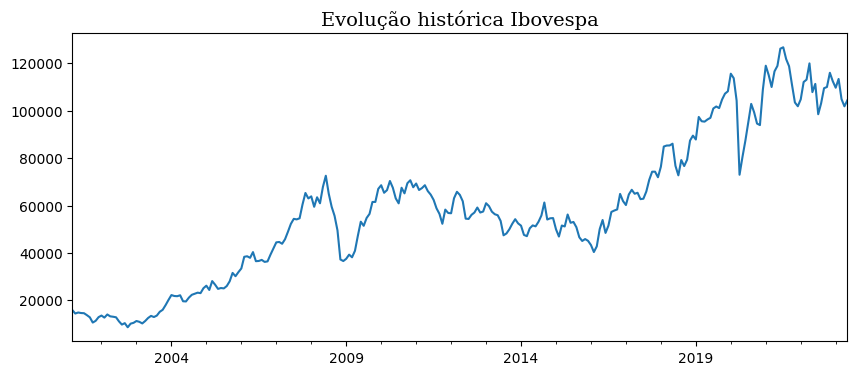

In [57]:
plt.figure(figsize=(10, 4))
font = {'family': 'serif',  # Choose a font family (e.g., 'serif', 'sans-serif', etc.)
        'color': 'black',    # Font color   # Font weight (e.g., 'normal', 'bold', 'light', 'heavy')
        'size': 14}   
df['bvsp'].plot()
plt.xlabel('', fontdict=font)  # Add a label to the x-axis if needed
plt.ylabel('', fontdict=font)   # Add a label to the y-axis if needed
plt.title('Evolução histórica Ibovespa', fontdict=font)  # Add a title to the plot if needed
# plt.xticks(fontdict=font, fontsize=12, color='black')
# plt.yticks(fontdict=font, fontsize=12, color='black')
# plt.savefig('latex/bvsp.pdf', format='pdf', bbox_inches='tight')

In [164]:
df

,class_low,bvsp
date,,
2016-05-01,0,53909.53
2016-06-01,0,48468.19
2016-11-01,0,64921.91
2016-12-01,0,61906.35
2017-05-01,0,65404.05
2017-06-01,0,62711.47
2018-06-01,0,76779.38
2018-10-01,0,79350.43
2018-11-01,0,87427.56


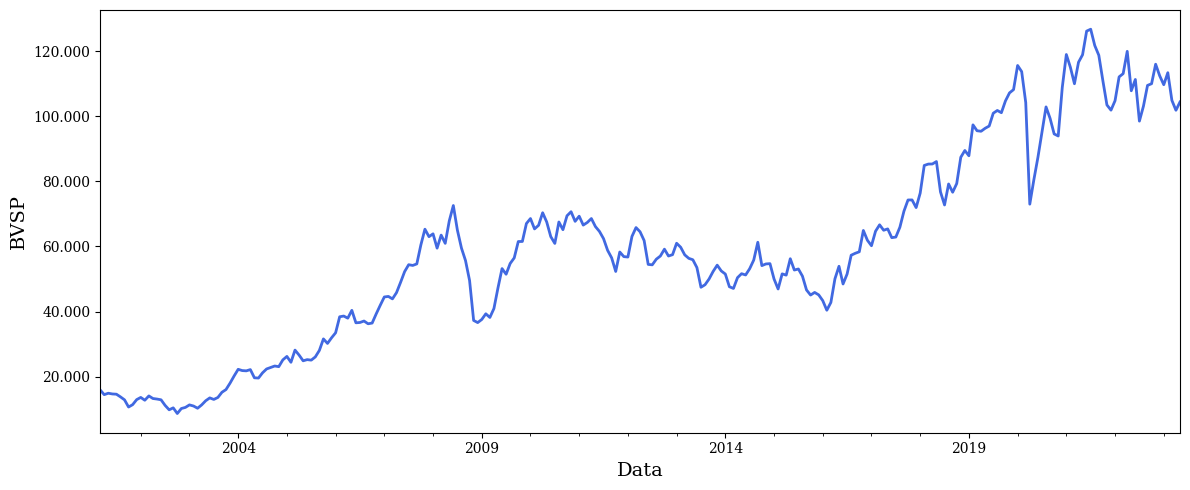

In [58]:
plt.figure(figsize=(12, 5))  # Increased the size for better readability

font = {
    'family': 'serif',
    'color': 'black',
    'size': 14
}

# Plotting with adjusted line width and color
df['bvsp'].plot(linewidth=2, color='royalblue')

plt.xlabel('Data', fontdict=font)
plt.ylabel('BVSP', fontdict=font)
# plt.title('Evolução histórica Ibovespa', fontdict=font)

# Set font properties for x-axis tick labels
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(font['family'])

# Set font properties for y-axis tick labels
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(font['family'])

# Adding gridlines
# plt.grid(True, which='both', linestyle='--', linewidth=0.1, color='gray')

# Formatting y-axis ticks
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x).replace(",", " ").replace(".", ",").replace(" ", "."))
)
# Annotating the chart (example)
# Replace with your significant events or remove if not applicable
# plt.annotate('Financial Crisis', xy=(2009, 40000), xytext=(2005, 20000),
#              arrowprops=dict(facecolor='black', arrowstyle='->'),
#              fontsize=10)

plt.tight_layout()
# plt.show()
plt.savefig('latex/bvsp.pdf', format='pdf', bbox_inches='tight')
plt.savefig('latex2/bvsp.pdf', format='pdf', bbox_inches='tight')

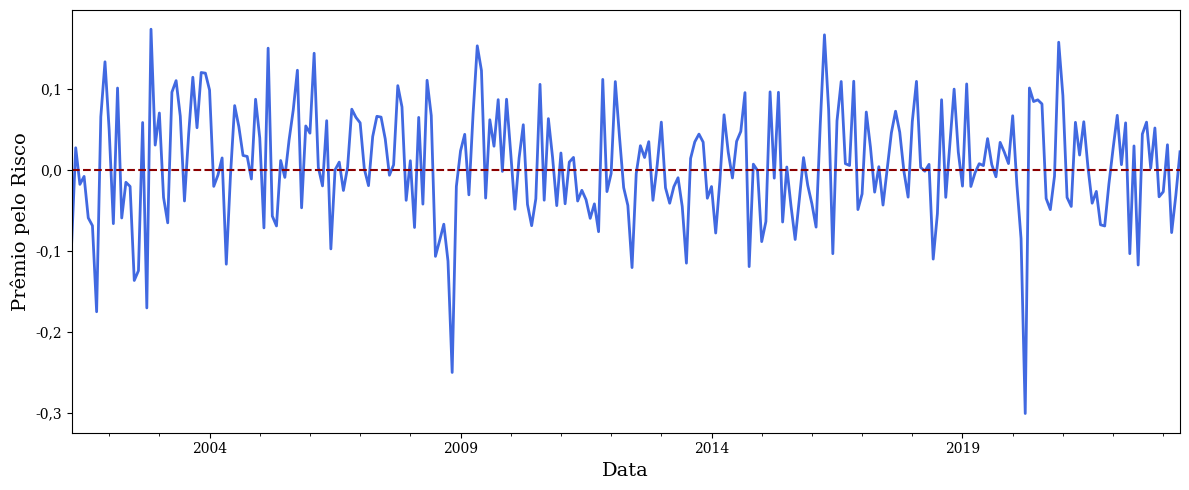

In [59]:
plt.figure(figsize=(12, 5))  # Increased the size for better readability

font = {
    'family': 'serif',
    'color': 'black',
    'size': 14
}

# Plotting with adjusted line width and color
df_merged['risk_premium'].plot(linewidth=2, color='royalblue')

plt.axhline(0, color='darkred', linestyle='--')
plt.xlabel('Data', fontdict=font)
plt.ylabel('Prêmio pelo Risco', fontdict=font)
# plt.title('Evolução histórica Ibovespa', fontdict=font)

# Set font properties for x-axis tick labels
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(font['family'])

# Set font properties for y-axis tick labels
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(font['family'])

# Adding gridlines
# plt.grid(True, which='both', linestyle='--', linewidth=0.1, color='gray')

# Formatting y-axis ticks
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,.1f}".format(x).replace(",", " ").replace(".", ",").replace(" ", "."))
)
# Annotating the chart (example)
# Replace with your significant events or remove if not applicable
# plt.annotate('Financial Crisis', xy=(2009, 40000), xytext=(2005, 20000),
#              arrowprops=dict(facecolor='black', arrowstyle='->'),
#              fontsize=10)

plt.tight_layout()
# plt.show()
plt.savefig('latex/risk_premium.pdf', format='pdf', bbox_inches='tight')
plt.savefig('latex2/risk_premium.pdf', format='pdf', bbox_inches='tight')

In [60]:
df_daily = pd.read_excel('bvsp_daily.xlsx')
df_daily = df_daily.rename(columns={'Date':'date','.BVSP':'bvsp'})

# removing first line (nan value) and early years with index value = 0 and unnecessary column names
df_daily = df_daily[df_daily['bvsp'] != 0]
df_daily = df_daily.iloc[1:]

# first values of data set are the most recent. we will invert this time series so we have a better
# understading of some calculations applied (rolling mean, difference of the series)
df_daily = df_daily[::-1]

# setting data as dataframe index
df_daily.set_index('date', inplace=True)

# values from object to float
df_daily['bvsp'] = df_daily['bvsp'].astype(float)
df_daily.loc[:, 'bvsp_daily_returns'] = df_daily['bvsp'].pct_change()
lambda_ewma = 0.94
df_daily['vol'] = df_daily['bvsp_daily_returns'].ewm(com=1 / (1 - lambda_ewma)).std()

In [61]:
df_daily = df_daily[df_daily.index >= '2000-03-01']

In [62]:
df_daily.to_csv('df_daily.csv', index = True)

In [63]:
df_daily_m = df_daily
df_daily_m.index = df_daily.index.to_period('M')


In [64]:
df_daily_m = df_daily_m.groupby('date').mean()

In [65]:
df_daily_m

,bvsp,bvsp_daily_returns,vol
date,,,
2000-03,18055.408571,0.000655,0.019454
2000-04,15910.058947,-0.006813,0.024023
2000-05,14694.279545,-0.001474,0.023594
2000-06,16458.034762,0.005524,0.022788
2000-07,17087.240476,-0.000607,0.020221
...,...,...,...
2023-01,110763.015909,0.001600,0.014661
2023-02,108328.717222,-0.004255,0.012795
2023-03,102479.156522,-0.001213,0.011436


df_daily has daily bvsp prices and returns for the period that we are looking at.

Let's calculate average vol for the period to classify each month by it's relative volatility (high or low)

In [66]:
vol_avg = df_daily['vol'].mean()

In [67]:
df_daily_m['class'] = 'High'
df_daily_m.loc[df_daily_m['vol'] <= vol_avg, 'class'] = 'Low'

In [68]:
df_daily_m.to_csv('df_daily_m.csv', index=True)

In [69]:
df_daily_m['class_low'] = np.where(df_daily_m['class'] == 'High', 0, 1)
df_daily_m['class_high'] = np.where(df_daily_m['class'] == 'High', 1, 0)

In [70]:
df_daily_m['class'].value_counts()

class
Low     170
High    109
Name: count, dtype: int64

In [71]:
df_daily_m['class_low'].value_counts()

class_low
1    170
0    109
Name: count, dtype: int64

In [72]:
df_daily_m['class_high'].value_counts()

class_high
0    170
1    109
Name: count, dtype: int64

In [73]:
i_c_low = df_daily_m['class_low'][df_daily_m.index > '2001-03']
i_c_high = df_daily_m['class_high'][df_daily_m.index > '2001-03']

In [74]:
vol_avg

0.01629827114425445

In [75]:
df_daily_m

,bvsp,bvsp_daily_returns,vol,class,class_low,class_high
date,,,,,,
2000-03,18055.408571,0.000655,0.019454,High,0,1
2000-04,15910.058947,-0.006813,0.024023,High,0,1
2000-05,14694.279545,-0.001474,0.023594,High,0,1
2000-06,16458.034762,0.005524,0.022788,High,0,1
2000-07,17087.240476,-0.000607,0.020221,High,0,1
...,...,...,...,...,...,...
2023-01,110763.015909,0.001600,0.014661,Low,1,0
2023-02,108328.717222,-0.004255,0.012795,Low,1,0
2023-03,102479.156522,-0.001213,0.011436,Low,1,0


In [76]:
i_c_low

date
2001-04    0
2001-05    0
2001-06    0
2001-07    1
2001-08    1
          ..
2023-01    1
2023-02    1
2023-03    1
2023-04    1
2023-05    1
Freq: M, Name: class_low, Length: 266, dtype: int64

In [77]:
i_c_low

date
2001-04    0
2001-05    0
2001-06    0
2001-07    1
2001-08    1
          ..
2023-01    1
2023-02    1
2023-03    1
2023-04    1
2023-05    1
Freq: M, Name: class_low, Length: 266, dtype: int64

In [78]:
i_c_high

date
2001-04    1
2001-05    1
2001-06    1
2001-07    0
2001-08    0
          ..
2023-01    0
2023-02    0
2023-03    0
2023-04    0
2023-05    0
Freq: M, Name: class_high, Length: 266, dtype: int64

## Now we have three pd series with same lenght: i_c_high, i_c_low and resid inside residuals_dict.values()

The sum of the their product will be the numerator of the equation:

$$    R^2_c = 1 - \frac{\sum_{t=1}^{T} I^c_t e^2_{it}}{\sum_{t=1}^{T} I^c_t (r_t - \bar{r})^2}       $$

First we will use $I_c = 1$ when monthly volatility is classified as 'Low' to get $R^2_c$ for periods with Low volatility.

Then we will use $I_c = 1$ when monthly volatility is classified as 'High' to get $R^2_c$ for periods with High volatility.


In [79]:
def disentangled_r_squared(r, e, I_c):
    """
    Calculate disentangled R^2.

    Parameters:
    - r: numpy array of excess returns.
    - e: numpy array of residuals from the regression.
    - I_c: numpy array of indicator function values, 1 if condition c holds and 0 otherwise.

    Returns:
    - Disentangled R^2 value.
    """
    
    r_mean = np.mean(r)
    
    numerator = np.sum(I_c * e**2)
    denominator = np.sum(I_c * (r - r_mean)**2)
    
    return 1 - (numerator / denominator)

In [80]:
r = df_merged['risk_premium']
# disentangled_r = np.empty((0,2), dtype=float)
disentangled_r_low = []
disentangled_r_high = []
for resid in residuals_dict.values():
    disentangled_r_low.append(disentangled_r_squared(r=r, e=resid.values, I_c=i_c_low.values))
    disentangled_r_high.append(disentangled_r_squared(r=r, e=resid.values, I_c=i_c_high.values))
    


In [81]:
i_c_low

date
2001-04    0
2001-05    0
2001-06    0
2001-07    1
2001-08    1
          ..
2023-01    1
2023-02    1
2023-03    1
2023-04    1
2023-05    1
Freq: M, Name: class_low, Length: 266, dtype: int64

In [82]:
print(f'R-squared Low mean: {np.mean(disentangled_r_low)} \nR-squared High mean: {np.mean(disentangled_r_high)}')

R-squared Low mean: 0.07753838490776234 
R-squared High mean: 0.039111561751300976


In [83]:
summary_data['R-squared Low'] = disentangled_r_low
summary_data['R-squared High'] = disentangled_r_high

In [84]:
summary_data

,R-squared,Coeficiente,T-stat,Valor-p,R-squared Low,R-squared High
Indicador,,,,,,
"MA(1,9)",14.490422,0.054327,6.688598,0.0,0.193468,0.110461
"MA(1,12)",11.00611,0.047254,5.713981,0.0,0.204872,0.042818
"MA(2,9)",5.554848,0.034166,3.940472,0.000104,0.063568,0.049861
"MA(2,12)",3.981271,0.028316,3.308528,0.001068,0.069401,0.018828
"MA(3,9)",1.109204,0.015031,1.720797,0.086459,0.022901,0.002717
"MA(3,12)",1.796083,0.019247,2.197358,0.028864,0.035220,0.005720
"VOL(1,9)",11.92132,0.05031,5.977626,0.0,0.079103,0.147661
"VOL(1,12)",9.009273,0.04436,5.112676,0.000001,0.090023,0.090142
"VOL(2,9)",3.263161,0.026187,2.984182,0.00311,0.017500,0.043364


In [85]:
print(f'R-squared Low mean: {np.mean(disentangled_r_low)} \nR-squared High mean: {np.mean(disentangled_r_high)}')

R-squared Low mean: 0.07753838490776234 
R-squared High mean: 0.039111561751300976


In [86]:
disentangled_r_low

[0.19346813765311022,
 0.20487181797554455,
 0.06356779089780618,
 0.06940091845464424,
 0.022900720168347655,
 0.03522034476047131,
 0.07910307877764455,
 0.0900227895325606,
 0.017499707737754777,
 0.020640776918894876,
 0.008037069475853365,
 0.017840257650717728,
 0.16155937897236694,
 0.1014045997329559]

In [87]:
list(residuals_dict.keys())

['cmp_moving_average_1_moving_average_9',
 'cmp_moving_average_1_moving_average_12',
 'cmp_moving_average_2_moving_average_9',
 'cmp_moving_average_2_moving_average_12',
 'cmp_moving_average_3_moving_average_9',
 'cmp_moving_average_3_moving_average_12',
 'cmp_obv_ma_1_obv_ma_9',
 'cmp_obv_ma_1_obv_ma_12',
 'cmp_obv_ma_2_obv_ma_9',
 'cmp_obv_ma_2_obv_ma_12',
 'cmp_obv_ma_3_obv_ma_9',
 'cmp_obv_ma_3_obv_ma_12',
 'mom_9',
 'mom_12']

In [88]:
df_is_dis_r = pd.DataFrame()

In [89]:
df_is_dis_r['Indicador'] = list(residuals_dict.keys())
df_is_dis_r['R^2 Low Volatility'] = disentangled_r_low
df_is_dis_r['R^2 High Volatility'] = disentangled_r_high

In [90]:
df_is_dis_r.set_index('Indicador', inplace=True)

In [91]:
df_is_dis_r.rename(index=col_name, inplace=True)

In [92]:
df_is_dis_r

,R^2 Low Volatility,R^2 High Volatility
Indicador,,
"MA(1,9)",0.193468,0.110461
"MA(1,12)",0.204872,0.042818
"MA(2,9)",0.063568,0.049861
"MA(2,12)",0.069401,0.018828
"MA(3,9)",0.022901,0.002717
"MA(3,12)",0.035220,0.005720
"VOL(1,9)",0.079103,0.147661
"VOL(1,12)",0.090023,0.090142
"VOL(2,9)",0.017500,0.043364


In [93]:
df_is_dis_r.to_csv('latex2/dis_r_in_sample.csv', index=True)

In [94]:
r2_to_pct(df_is_dis_r, r2_col='R^2 Low Volatility', path_to_csv='latex2/dis_r_in_sample.csv', r2_col_2='R^2 High Volatility')

In [95]:
df_is_dis_r

,R^2 Low Volatility,R^2 High Volatility
Indicador,,
"MA(1,9)",19.346814,11.046111
"MA(1,12)",20.487182,4.281824
"MA(2,9)",6.356779,4.986093
"MA(2,12)",6.940092,1.882778
"MA(3,9)",2.290072,0.271693
"MA(3,12)",3.522034,0.571982
"VOL(1,9)",7.910308,14.766060
"VOL(1,12)",9.002279,9.014233
"VOL(2,9)",1.749971,4.336365


### As expected, in low volatility periods, linear regression performs better than in periods with high volatility.

# Now let's see the performance out-of-sample

We will use rolling windows to get one-step prediction of the time series. One exemple can ilustrate the idea:
If we use window_size = 60, we'll first eliminate the 60 last values of the time series, run regression for the 206 that left (considering a time series with 266 values), and getting the prediction for 207th month.
To get the prediction for the 208th month, we'll run again the linear regression, but now excluding only the last 59 values of the time seires.

In [96]:
df_merged

,bvsp,volume,moving_average_1,moving_average_2,moving_average_3,moving_average_9,moving_average_12,"MA(1,9)","MA(1,12)","MA(2,9)",...,"VOL(1,12)","VOL(2,9)","VOL(2,12)","VOL(3,9)","VOL(3,12)",MOM(9),MOM(12),selic,bvsp_returns,risk_premium
date,,,,,,,,,,,,,,,,,,,,,
2001-04,14441.44,4.651415e+12,14441.44,15166.045,16000.743333,15687.770000,15708.353333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002680,-0.091199,-0.093879
2001-05,14877.14,5.939482e+12,14877.14,14659.290,15069.743333,15510.250000,15648.429167,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002712,0.030170,0.027458
2001-06,14654.43,4.350074e+12,14654.43,14765.785,14657.670000,15209.663333,15622.353333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002799,-0.014970,-0.017769
2001-07,14579.30,3.623631e+12,14579.30,14616.865,14703.623333,15057.387778,15441.733333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002829,-0.005127,-0.007956
2001-08,13757.49,3.926633e+12,13757.49,14168.395,14330.406667,14935.122222,15215.289167,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002838,-0.056368,-0.059207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,109733.88,2.955807e+11,109733.88,111106.280,112749.940000,108750.518889,110336.847500,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.002507,-0.024403,-0.026910
2023-02,113429.60,2.287220e+11,113429.60,111581.740,111880.720000,109367.568889,110444.029167,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.002507,0.033679,0.031172
2023-03,104933.17,3.270232e+11,104933.17,109181.385,109365.550000,108654.531111,109759.871667,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.002507,-0.074905,-0.077412


In [97]:
# X = [x for x in df_merged.drop(columns=['risk_premium', 'bvsp','volume','selic','bvsp_returns','moving_average_1',
#     'moving_average_2',
#     'moving_average_3',
#     'moving_average_9',
#     'moving_average_12', 
#     'OBV',
#     'obv_ma_1',
#     'obv_ma_2',
#     'obv_ma_3',
#     'obv_ma_9',
#     'obv_ma_12']).columns]
# residuals_dict = {}
# for x in X:
#     model = smf.ols(formula=f"risk_premium ~ {x}", data=df_merged).fit()
#     # summary = model.summary()
#     r_squared = model.rsquared
#     intercept = model.params[1]  # Replace 'Intercept' with the actual column name
#     t_values = model.tvalues[1]
#     p_values = model.pvalues[1]
#     residuals_dict[x] = model.resid
#     # residuals.append(model.resid[1])
#     stats_list = [x, r_squared, intercept, t_values, p_values]
#     stats_df = pd.DataFrame(stats_list).T
#     summary_data = pd.concat([summary_data, stats_df], ignore_index=True)

In [98]:
# window_size = 60
# X = [x for x in df_merged_old_col_names.drop(columns=['risk_premium', 'bvsp', 'volume', 'selic', 'bvsp_returns',
#     'moving_average_1', 'moving_average_2', 'moving_average_3', 'moving_average_9',
#     'moving_average_12', 'OBV', 'obv_ma_1', 'obv_ma_2', 'obv_ma_3', 'obv_ma_9', 'obv_ma_12']).columns]
# coef_estimates = []
# df_oos = pd.DataFrame({
#                 'date' : [],
#                 'indicator' : []
#                 })

# # print(X) # X - ok
# for i in reversed(range(window_size)):
#     window_data = df_merged_old_col_names.iloc[0:len(df_merged_old_col_names)-i] # Warning - window_data contains unwanted columns
#     window_data = window_data.drop(columns=['bvsp', 'volume', 'selic', 'bvsp_returns',
#     'moving_average_1', 'moving_average_2', 'moving_average_3', 'moving_average_9',
#     'moving_average_12', 'OBV', 'obv_ma_1', 'obv_ma_2', 'obv_ma_3', 'obv_ma_9', 'obv_ma_12'])
#     print(f'Window data: {window_data} \n')
#     for x in X:
#         print(f'x: {x} \n')
#         model = smf.ols(formula=f"risk_premium ~ {x}", data=window_data).fit()
#         coef_estimates.append(model.params[1])
#         next_data = df_merged_old_col_names.iloc[len(df_merged_old_col_names)-i]
#         # next_x = pd.DataFrame({'1': [next_data[x]]})
#         print(f'Next data: {next_data} \n')
#         next_x = pd.DataFrame({f'{x}': [next_data[x]]})
#         next_date = next_data.index
#         print(next_date)
#         print(next_x)
#         prediction = model.predict(exog=next_x)
#         # appending_list = []
#         input()
        

    
    # next_data = df_merged_old_col_names.iloc[len(df_merged_old_col_names)-i]  # O próximo ponto
    # next_x = next_data[x]  # Seleciona apenas as variáveis independentes
    # predictions = []
    # print(len(window_data))
    # print(next_x)
    # for x in X:
    #     prediction = model.predict(exog=next_x)[0]  # Faça a previsão
    #     predictions.append(prediction)



In [99]:
window_size = 86
X = [x for x in df_merged_old_col_names.drop(columns=['risk_premium', 'bvsp', 'volume', 'selic', 'bvsp_returns',
    'moving_average_1', 'moving_average_2', 'moving_average_3', 'moving_average_9',
    'moving_average_12', 'OBV', 'obv_ma_1', 'obv_ma_2', 'obv_ma_3', 'obv_ma_9', 'obv_ma_12']).columns]
coef_estimates = []

predictions_df = pd.DataFrame()

# print(X) # X - ok
for x in X:
    predictions = []
    pred_ind = []
    # predictions_df = pd.DataFrame(columns = f'{x}')
    for i in reversed(range(window_size)):
        window_data = df_merged_old_col_names.iloc[0:len(df_merged_old_col_names)-i] # Warning - window_data contains unwanted columns
        window_data = window_data.drop(columns=['bvsp', 'volume', 'selic', 'bvsp_returns',
        'moving_average_1', 'moving_average_2', 'moving_average_3', 'moving_average_9',
        'moving_average_12', 'OBV', 'obv_ma_1', 'obv_ma_2', 'obv_ma_3', 'obv_ma_9', 'obv_ma_12'])
        # print(f'Window data: {window_data} \n')  
        # print(f'x: {x} \n')
        # print(len(window_data))
        model = smf.ols(formula=f"risk_premium ~ {x}", data=window_data).fit()
        coef_estimates.append(model.params[1])
        try:
            next_data = df_merged_old_col_names.iloc[len(df_merged_old_col_names)-i]
        except:
            continue
        # next_x = pd.DataFrame({'1': [next_data[x]]})
        # print(f'Next data: {next_data} \n')
        next_x = pd.DataFrame({f'{x}': [next_data[x]]})
        next_date = next_data.name
        pred_ind.append(next_date)
        # print(next_date)
        # print(next_x)
        prediction = model.predict(exog=next_x)
        predictions.append(prediction[0])
        # input()
        # appending_list = []
    pred_series = pd.Series(predictions, index=pred_ind)
    predictions_df[f'{x}'] = pred_series




In [100]:
predictions_df

,cmp_moving_average_1_moving_average_9,cmp_moving_average_1_moving_average_12,cmp_moving_average_2_moving_average_9,cmp_moving_average_2_moving_average_12,cmp_moving_average_3_moving_average_9,cmp_moving_average_3_moving_average_12,cmp_obv_ma_1_obv_ma_9,cmp_obv_ma_1_obv_ma_12,cmp_obv_ma_2_obv_ma_9,cmp_obv_ma_2_obv_ma_12,cmp_obv_ma_3_obv_ma_9,cmp_obv_ma_3_obv_ma_12,mom_9,mom_12
2016-05,0.030827,0.028398,0.022920,0.019383,0.013711,0.014459,0.028830,0.024621,0.019191,0.016188,0.014666,0.015162,0.022281,-0.008994
2016-06,0.031239,0.028846,0.023393,0.019913,0.014289,0.015014,0.029245,0.025058,0.019712,0.016699,0.015235,0.015696,0.022783,-0.007989
2016-07,0.029980,0.027573,0.022239,0.018737,0.013178,0.013927,0.028050,0.023941,0.018561,0.015654,0.014115,0.014632,0.021581,-0.009125
2016-08,0.030265,0.027890,0.022587,0.019135,0.013624,0.014354,0.028342,0.024259,0.018952,0.016044,0.014552,0.015041,0.021951,0.019124
2016-09,0.030991,0.028659,0.023362,0.019978,0.014511,0.015210,0.029060,0.024987,0.019782,0.016841,0.015430,0.015868,0.022768,0.020026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,0.027986,-0.021802,0.019965,0.018415,0.013588,0.014415,0.024720,0.021811,0.017126,0.015260,0.013701,0.013692,-0.014220,0.017787
2023-02,0.027653,0.025157,0.019691,0.018135,0.013341,0.014169,0.024423,0.021539,0.016869,0.015029,0.013459,0.013463,0.021103,0.017509
2023-03,-0.026585,-0.021854,0.019758,-0.009539,0.013449,-0.004216,-0.025746,-0.022548,0.016952,0.015117,0.013564,0.013562,-0.014347,-0.008267
2023-04,-0.027104,-0.022415,-0.015200,-0.010211,-0.002080,-0.004987,-0.026326,-0.023201,-0.009896,-0.009390,-0.002947,0.013054,0.021165,-0.008945


In [101]:
df_merged_old_col_names.iloc[len(df_merged)-85]

bvsp                                      5.390953e+04
volume                                    8.119958e+10
moving_average_1                          5.390953e+04
moving_average_2                          5.198197e+04
moving_average_3                          4.891970e+04
moving_average_9                          4.590931e+04
moving_average_12                         4.749037e+04
cmp_moving_average_1_moving_average_9     1.000000e+00
cmp_moving_average_1_moving_average_12    1.000000e+00
cmp_moving_average_2_moving_average_9     1.000000e+00
cmp_moving_average_2_moving_average_12    1.000000e+00
cmp_moving_average_3_moving_average_9     1.000000e+00
cmp_moving_average_3_moving_average_12    1.000000e+00
OBV                                       1.444247e+16
obv_ma_1                                  1.444247e+16
obv_ma_2                                  1.444243e+16
obv_ma_3                                  1.444238e+16
obv_ma_9                                  1.444233e+16
obv_ma_12 

We can compare predictions given by the loop above with manually calculation using model.params:

In [102]:
# This cell can be used to validate the above one-step ahead prediction model by adding 'input()' before the end
# of above loop


# print(predictions,x)
# print(window_data)
# x_last = window_data[x].iloc[-1]

# gamma = model.params['Intercept']
# lambda_coef = model.params[1]
# r_predicted = gamma + lambda_coef * x_last
# print(r_predicted)
# print(predictions)

## With OOS predicted returns, we need to calculate R² and R² for low and heightened uncertainty

We will use Equations 14 and 15 from Fernandez (2023)


 $$  14)  \quad R^2_{OS} = 1 - \frac{\sum{(r_t - \hat{r}_t})^2}{\sum{(r_t - \hat{r}_t^{HA}})^2}      $$
 $$  15)  \quad R^2_{OS}(c) = 1 - \frac{\sum{(r_t - \hat{r}_{i,t}})^2 I_t^c}{\sum{(r_t - \hat{r}_t^{HA}})^2 I_t^c}      $$

Where $r_t$ is the actual return for time t, $\hat{r}_t$ is the forecasting from the predictive regression OOS, $\hat{r}_t^{HA}$ is the forecast from the historical average and $I_t^c$ will be 1 when calculating $R^2{OS}$ for hightened uncertainty for periods with high uncertainty and 0 for periods with low uncertainty. For calculating $R^2{OS}$ for periods with low uncertainty, we will use $I_t^c = 1$ when t is labed as Low uncertainty and $I_t^c = 0$ when it is labed as High Uncertainty


We have ${r}_t$ and $\hat{r}_t$, we need to calculate the historical average for each OOS predicted t.




In [103]:
df_merged_old_col_names['HA'] = df_merged_old_col_names['risk_premium'].expanding().mean()

In [104]:
df_merged_old_col_names['HA']

date
2001-04   -0.093879
2001-05   -0.033210
2001-06   -0.028063
2001-07   -0.023036
2001-08   -0.030270
             ...   
2023-01    0.007573
2023-02    0.007662
2023-03    0.007340
2023-04    0.007193
2023-05    0.007251
Freq: M, Name: HA, Length: 266, dtype: float64

In [105]:
df_merged_old_col_names[['risk_premium', 'HA']]

,risk_premium,HA
date,,
2001-04,-0.093879,-0.093879
2001-05,0.027458,-0.033210
2001-06,-0.017769,-0.028063
2001-07,-0.007956,-0.023036
2001-08,-0.059207,-0.030270
...,...,...
2023-01,-0.026910,0.007573
2023-02,0.031172,0.007662
2023-03,-0.077412,0.007340


Done

In [106]:
def r_squared_oos(r, r_hat, r_hat_ha):
    """
    Calculate OOS R^2.

    Parameters:
    - r: numpy array of excess returns.
    - r_hat: predicted excess returns.
    - r_hat_ha: baseline predictor - historical average.

    Returns:
    - OOS R^2 value.
    """
    
    numerator = np.sum((r - r_hat)**2)
    denominator = np.sum((r - r_hat_ha)**2)
    
    return 1 - (numerator / denominator)

In [107]:
r_oos = df_merged['risk_premium'].iloc[len(df_merged)-window_size+1:len(df_merged)]
r_hat_ha = df_merged_old_col_names['HA'].iloc[len(df_merged)-window_size+1:len(df_merged)]
# print(len(r_oos), len(r_hat_ha), len(predictions_df)) # All returns has the same lenght
r_squared_oos_values = []

for x in X:
    r_hat = predictions_df[x]
    # print(r_hat)
    r_squared_oos_values.append(r_squared_oos(r=r_oos, r_hat=r_hat, r_hat_ha=r_hat_ha))
    

In [108]:
sum(disentangled_r_high)/len(disentangled_r_high)

0.039111561751300976

In [109]:
sum(r_squared_oos_values)/len(r_squared_oos_values)

0.011117354088675915

In [110]:
df_oos_r = pd.DataFrame()
df_oos_r['Indicador'] = X
df_oos_r['R^2 OOS'] = r_squared_oos_values
df_oos_r.set_index('Indicador', inplace=True)
df_oos_r.rename(index=col_name, inplace=True)
df_oos_r.to_csv('latex2/df_oos_r.csv', index=True)

In [111]:
r2_to_pct(df_oos_r, r2_col='R^2 OOS', path_to_csv='latex2/df_oos_r.csv')

In [112]:
df_oos_r

,R^2 OOS
Indicador,
"MA(1,9)",8.013808
"MA(1,12)",5.817534
"MA(2,9)",-2.125659
"MA(2,12)",1.338460
"MA(3,9)",-1.146056
"MA(3,12)",0.116613
"VOL(1,9)",2.233014
"VOL(1,12)",2.480722
"VOL(2,9)",-1.282282


In [113]:
r_squared_oos_values

[0.08013807599509071,
 0.05817533915525275,
 -0.0212565870045065,
 0.013384604582728277,
 -0.011460563555795611,
 0.0011661300490578563,
 0.022330144875066238,
 0.024807216633276896,
 -0.012822820356919395,
 -0.005039973896908467,
 -0.017037801844697942,
 -0.026575074245079433,
 0.03991535839849658,
 0.009918908456400866]

In [114]:
def disentangled_r_squared_oos(r, r_hat, r_hat_ha, I_c):
    """
    Calculate OOS R^2.

    Parameters:
    - r: numpy array of excess returns.
    - r_hat: numpy array of predicted excess returns.
    - r_hat_ha: numpy array of baseline predictor - historical average.
    - I_c: numpy array of indicator function values, 1 if condition c holds and 0 otherwise.
    
    Returns:
    - OOS Disentangled R^2 value.
    """
    
    numerator = np.sum(I_c*(r - r_hat)**2)
    denominator = np.sum(I_c*(r - r_hat_ha)**2)
    
    return 1 - (numerator / denominator)

In [115]:
low_disentangled_r_squared_oos_values = []
high_disentangled_r_squared_oos_values = []

oos_i_c_high = i_c_high.iloc[len(df_merged)-window_size+1:len(df_merged)]
oos_i_c_low = i_c_low.iloc[len(df_merged)-window_size+1:len(df_merged)]
for x in X:
    r_hat = predictions_df[x]
    # print(r_hat)
    low_disentangled_r_squared_oos_values.append(disentangled_r_squared_oos(r=r_oos, r_hat=r_hat, r_hat_ha=r_hat_ha, I_c=oos_i_c_low))
    high_disentangled_r_squared_oos_values.append(disentangled_r_squared_oos(r=r_oos, r_hat=r_hat, r_hat_ha=r_hat_ha, I_c=oos_i_c_high))

In [116]:
oos_i_c_low.value_counts()

class_low
1    71
0    14
Name: count, dtype: int64

In [117]:
print(f' Avg Disentangled R² OOS (Low):{sum(low_disentangled_r_squared_oos_values)/len(low_disentangled_r_squared_oos_values)}')

 Avg Disentangled R² OOS (Low):0.0028126973059960847


In [118]:
print(f' Avg Disentangled R² OOS (High):{sum(high_disentangled_r_squared_oos_values)/len(high_disentangled_r_squared_oos_values)}')

 Avg Disentangled R² OOS (High):0.02388472940202168


In [119]:
sorted(low_disentangled_r_squared_oos_values)

[-0.08513002232059264,
 -0.06925663473486354,
 -0.06156142654483099,
 -0.05372622009322958,
 -0.04816734294097147,
 -0.04316583122685347,
 -0.009807898124330361,
 -0.007807378403467791,
 0.012121997678078755,
 0.03692170201247558,
 0.04074006738173164,
 0.07649679947163801,
 0.11535019859044127,
 0.13636975153871977]

In [120]:
sorted(high_disentangled_r_squared_oos_values)

[-0.03885752002365317,
 -0.03746478407773002,
 -0.029723885099178782,
 -0.02280075075900223,
 -0.017076880659494087,
 -0.01632405039416085,
 -0.01567715168592909,
 -0.006311120516092172,
 0.023130788628039634,
 0.02721208425465227,
 0.041514980338559826,
 0.06980906490777727,
 0.1694186708164941,
 0.18753676589802082]

### We've just seen that Disentangled R² OOS is higher for periods with high volatility
Probably, the problem is that majority of OOS values are classified as low volatility (71 vs 14). 

We will show this in a chart:

In [121]:
df_plot_test = df_merged[['risk_premium', 'bvsp']]

In [122]:
df_plot_test['low_risk'] = i_c_low.values

/tmp/ipykernel_27322/1008031324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_test['low_risk'] = i_c_low.values


In [123]:
df_plot_test['low_risk']

date
2001-04    0
2001-05    0
2001-06    0
2001-07    1
2001-08    1
          ..
2023-01    1
2023-02    1
2023-03    1
2023-04    1
2023-05    1
Freq: M, Name: low_risk, Length: 266, dtype: int64

In [124]:
low_risk_data = df_plot_test[df_plot_test['low_risk'] == 1]
high_risk_data = df_plot_test[df_plot_test['low_risk'] == 0]

In [125]:
df_plot_test

,risk_premium,bvsp,low_risk
date,,,
2001-04,-0.093879,14441.44,0
2001-05,0.027458,14877.14,0
2001-06,-0.017769,14654.43,0
2001-07,-0.007956,14579.30,1
2001-08,-0.059207,13757.49,1
...,...,...,...
2023-01,-0.026910,109733.88,1
2023-02,0.031172,113429.60,1
2023-03,-0.077412,104933.17,1


In [126]:
low_risk_data

,risk_premium,bvsp,low_risk
date,,,
2001-07,-0.007956,14579.30,1
2001-08,-0.059207,13757.49,1
2002-04,-0.059340,13253.00,1
2003-06,0.066594,13441.01,1
2003-07,-0.038335,12967.27,1
...,...,...,...
2023-01,-0.026910,109733.88,1
2023-02,0.031172,113429.60,1
2023-03,-0.077412,104933.17,1


In [127]:
csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}

In [128]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

In [129]:
font = {
    'family': 'serif',
    'color': 'black',
    'size': 14
}

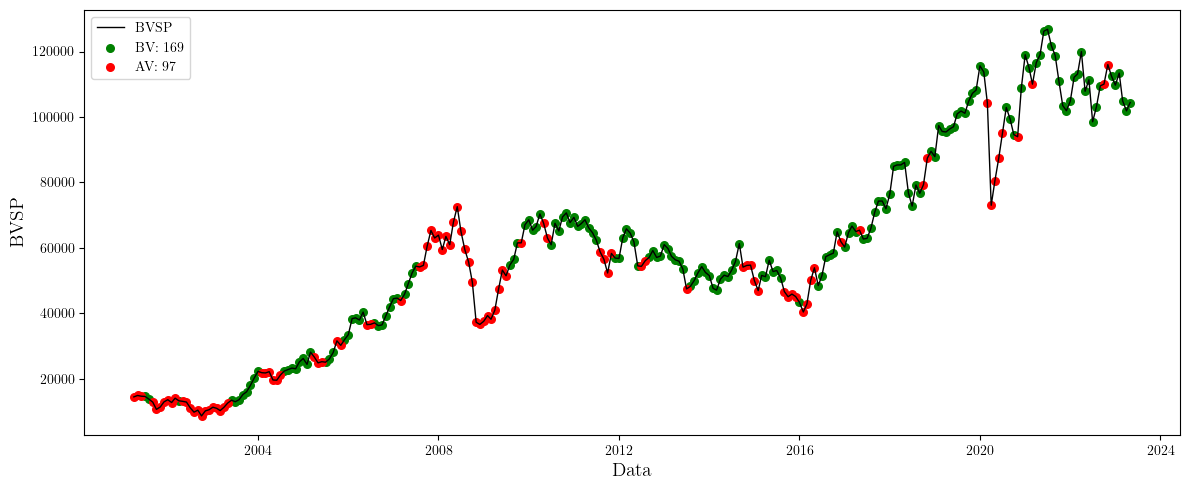

In [165]:
for df in [low_risk_data,high_risk_data,df_plot_test]:
    if isinstance(df.index, pd.PeriodIndex):
        df.index = df.index.to_timestamp()

# Plotting the risk_premium as a line
plt.figure(figsize=(12, 5))
plt.plot(df_plot_test.index, df_plot_test['bvsp'], 'black', label='BVSP',linewidth=1)  # blue line for risk premium
# plt.axvline(pd.Timestamp('2016-05'), color='darkblue', linestyle='--')
# Adding scatter plots for the risk classifications
plt.scatter(low_risk_data.index, low_risk_data['bvsp'], color='green', label=f'BV: {i_c_low.value_counts()[1]}', s=30)  # green dots for low risk
plt.scatter(high_risk_data.index, high_risk_data['bvsp'], color='r', label=f'AV: {i_c_low.value_counts()[0]}', s=30)  # red dots for high risk

for label in plt.gca().get_xticklabels():
    label.set_fontproperties(font['family'])

# Set font properties for y-axis tick labels
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(font['family'])

# plt.title('Risk Premium Over Time', fondict=font)
plt.xlabel('Data', fontdict=font)
plt.ylabel('BVSP', fontdict=font)
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig('latex2/bvsp_vol.pdf', format='pdf', bbox_inches='tight')
plt.show()

As we can see, most of OOS values (index > dashed horizontal blue line) have been classified as Low Risk. We should reclassify values using historical average volatility for this OOS period (istead of using the whole period)

## Reclassifying volatilty for the OOS period

Let's calculate the average volatilty for the OOS sample and create new columns in df_daily_m for it

In [131]:
df_daily_m

,bvsp,bvsp_daily_returns,vol,class,class_low,class_high
date,,,,,,
2000-03,18055.408571,0.000655,0.019454,High,0,1
2000-04,15910.058947,-0.006813,0.024023,High,0,1
2000-05,14694.279545,-0.001474,0.023594,High,0,1
2000-06,16458.034762,0.005524,0.022788,High,0,1
2000-07,17087.240476,-0.000607,0.020221,High,0,1
...,...,...,...,...,...,...
2023-01,110763.015909,0.001600,0.014661,Low,1,0
2023-02,108328.717222,-0.004255,0.012795,Low,1,0
2023-03,102479.156522,-0.001213,0.011436,Low,1,0


In [132]:
df_daily_m_oos = df_daily_m.iloc[df_daily_m.index >= pd.to_datetime('2016-05').to_period('M')][['vol']] # note that index selection is
                                                                                                        # hard coded. Not optimal
df_daily_m_oos

,vol
date,
2016-05,0.018490
2016-06,0.015899
2016-07,0.013960
2016-08,0.011131
2016-09,0.013239
...,...
2023-01,0.014661
2023-02,0.012795
2023-03,0.011436


In [133]:
oos_avg_vol = df_daily_m_oos.mean()[0]
oos_avg_vol

0.014298026182305397

In [134]:
df_daily_m_oos['class_low'] = 0
df_daily_m_oos['class_low'].iloc[df_daily_m_oos['vol'] < oos_avg_vol] = 1

/tmp/ipykernel_27322/633156007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_m_oos['class_low'].iloc[df_daily_m_oos['vol'] < oos_avg_vol] = 1


To get rid of this warning message, we can rewrite this logic using .loc:

In [135]:
df_daily_m_oos['class_low'] = 0
df_daily_m_oos['class_high'] = 0
df_daily_m_oos.loc[df_daily_m_oos['vol'] < oos_avg_vol, 'class_low'] = 1
df_daily_m_oos.loc[df_daily_m_oos['vol'] > oos_avg_vol, 'class_high'] = 1

In [136]:
df_daily_m_oos['class_low'].value_counts()

class_low
1    58
0    27
Name: count, dtype: int64

In [137]:
df_daily_m_oos['class_high'].value_counts()

class_high
0    58
1    27
Name: count, dtype: int64

In [138]:
# reclassified_ic_low_oss = [1 if x == 1 else 0 for x in df_daily_m_oos['class_low']]
# reclassified_ic_high_oss = [1 if x == 0 else 0 for x in df_daily_m_oos['class_low']]

In [139]:
reclassified_ic_low_oss = df_daily_m_oos['class_low']
reclassified_ic_high_oss = df_daily_m_oos['class_high']

In [140]:
reclass_low_disentangled_r_squared_oos_values = []
reclass_high_disentangled_r_squared_oos_values = []

for x in X:
    r_hat = predictions_df[x]
    # print(r_hat)
    reclass_low_disentangled_r_squared_oos_values.append(disentangled_r_squared_oos(r=r_oos, r_hat=r_hat, r_hat_ha=r_hat_ha, I_c=reclassified_ic_low_oss))
    reclass_high_disentangled_r_squared_oos_values.append(disentangled_r_squared_oos(r=r_oos, r_hat=r_hat, r_hat_ha=r_hat_ha, I_c=reclassified_ic_high_oss))

In [141]:
print(f'Avg Disentangled R² Reclassified (Low): {sum(reclass_low_disentangled_r_squared_oos_values)/len(reclass_low_disentangled_r_squared_oos_values)}')

Avg Disentangled R² Reclassified (Low): 0.014166115153343166


In [142]:
print(f'Avg Disentangled R² Reclassified (High): {sum(reclass_high_disentangled_r_squared_oos_values)/len(reclass_high_disentangled_r_squared_oos_values)}')

Avg Disentangled R² Reclassified (High): 0.008764696134219239


In [143]:
df_oos_dis_r = pd.DataFrame()
df_oos_dis_r['Indicador'] = X
df_oos_dis_r['R^2 OOS Low'] = reclass_low_disentangled_r_squared_oos_values
df_oos_dis_r['R^2 OOS High'] = reclass_high_disentangled_r_squared_oos_values
df_oos_dis_r.set_index('Indicador', inplace=True)
df_oos_dis_r.rename(index=col_name, inplace=True)
df_oos_dis_r.to_csv('latex2/df_oos_dis_r.csv', index=True)

In [144]:
df_oos_dis_r

,R^2 OOS Low,R^2 OOS High
Indicador,,
"MA(1,9)",0.132605,0.039651
"MA(1,12)",0.184762,-0.039509
"MA(2,9)",0.008037,-0.043862
"MA(2,12)",0.096120,-0.050460
"MA(3,9)",0.013077,-0.030395
"MA(3,12)",0.050559,-0.036949
"VOL(1,9)",-0.105565,0.121024
"VOL(1,12)",-0.096564,0.118467
"VOL(2,9)",-0.068758,0.030341


In [145]:
r2_to_pct(df_oos_dis_r, r2_col='R^2 OOS Low', path_to_csv='latex2/df_oos_dis_r.csv', r2_col_2='R^2 OOS High')

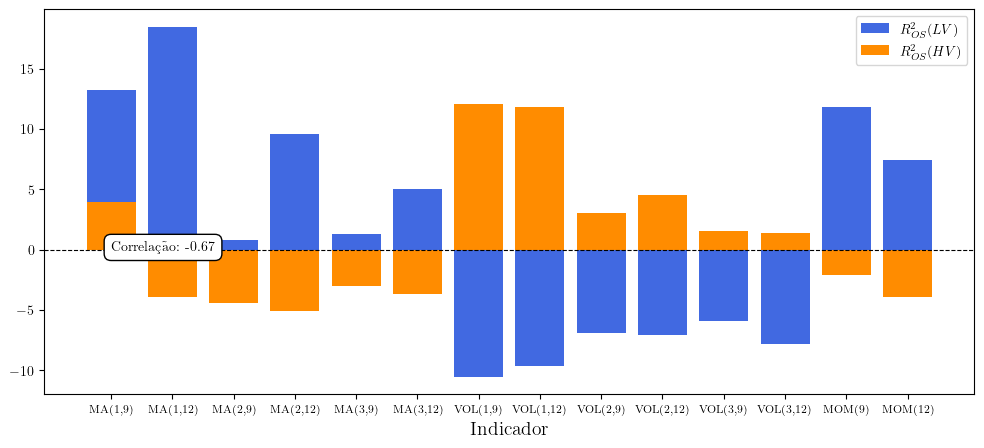

In [146]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['text.usetex'] = True
plt.figure(figsize = (12,5))
# fig, ax = plt.subplots(layout='constrained')

plt.bar(df_oos_dis_r.index, df_oos_dis_r['R^2 OOS Low'], label='$R^2_{OS}(LV)$', color='royalblue', linewidth=2)
plt.bar(df_oos_dis_r.index, df_oos_dis_r['R^2 OOS High'], label='$R^2_{OS}(HV)$', color='darkorange', linewidth=2)
corr_coeff = np.corrcoef(df_oos_dis_r['R^2 OOS Low'], df_oos_dis_r['R^2 OOS High'])[0, 1]


plt.xlabel('Indicador', fontdict=font)
# plt.ylabel('BVSP', fontdict=font)
# Add the correlation coefficient as text to the plot
plt.text('MA(1,9)', -0.1, f'Correlação: {corr_coeff:.2f}', fontsize=10, color='black',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
# plt.text('MA(1,9)', -0.1, f'Correlation: {corr_coeff:.2f}', fontsize=10, color='black')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(fontsize=8)
plt.legend()

plt.savefig('latex2/r_2_oos_correl.pdf', format='pdf', bbox_inches='tight')
plt.show()

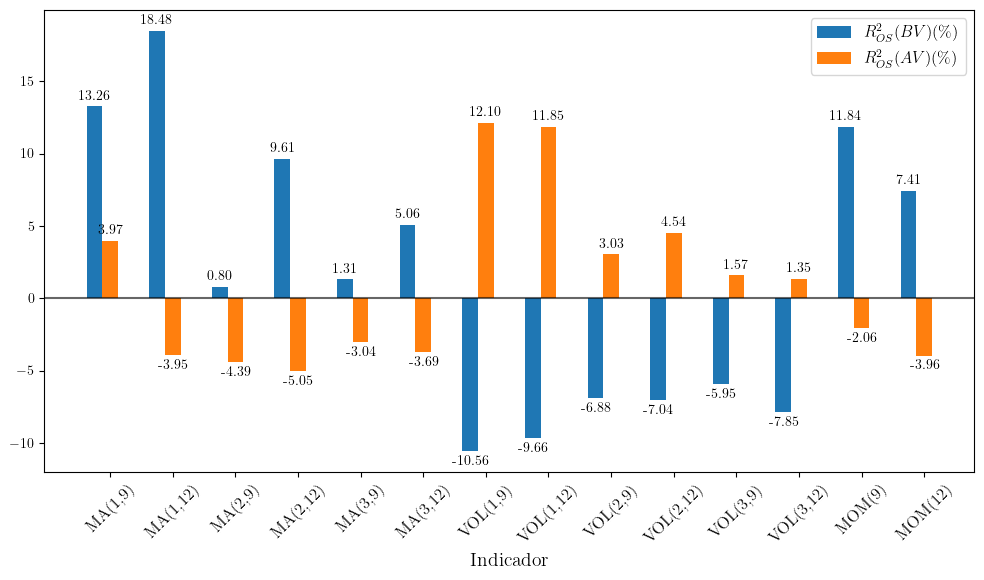

In [147]:
rcParams.update(rcParamsDefault)
plt.rcParams["font.family"] = "serif"
plt.rcParams['text.usetex'] = True
# plt.figure(figsize = (12,5))
fig, ax = plt.subplots(figsize = (12,6))

ind = df_oos_dis_r.index
ind_hv_lv = df_oos_dis_r[['R^2 OOS Low', 'R^2 OOS High']].rename(columns={
    'R^2 OOS Low':'$R^2_{OS}(BV)(\%)$', 'R^2 OOS High' : '$R^2_{OS}(AV)(\%)$'
    }).to_dict('list')

x = np.arange(len(ind))
width = 0.25
multiplier = 0

for attribute, measurement in ind_hv_lv.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt='%.2f', padding=3)
    multiplier += 1

corr_coeff = np.corrcoef(df_oos_dis_r['R^2 OOS Low'], df_oos_dis_r['R^2 OOS High'])[0, 1]
ax.axhline(0, color='black', linestyle='-', alpha=0.6)
# plt.text(-.25, -9.5, f'Correlação: {corr_coeff:.2f}', fontsize=12, color='black',
#          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
ax.set_xticks(x + width, ind)
ax.legend(loc='upper right', ncols=2)
plt.xlabel('Indicador', fontdict=font)
plt.legend(fontsize='large')  # Adjust legend font size
plt.xticks(fontsize='large')
plt.xticks(rotation=45)
# plt.tight_layout() 
plt.savefig('latex2/r_2_oos_correl.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [148]:
ind_hv_lv = df_oos_dis_r[['R^2 OOS Low', 'R^2 OOS High']].to_dict('list')
ind_hv_lv

{'R^2 OOS Low': [13.260497764431623,
  18.47623324525236,
  0.8037047913659445,
  9.611958869757864,
  1.3076606257060752,
  5.055933515239596,
  -10.556484621307028,
  -9.656425930231617,
  -6.875794935366808,
  -7.0383918814096225,
  -5.951663253541795,
  -7.851167983837204,
  11.839873063196782,
  7.40662794542426],
 'R^2 OOS High': [3.965058914632924,
  -3.95088972918054,
  -4.386180326886735,
  -5.046005702274603,
  -3.0395326403917844,
  -3.6949456714756357,
  12.102373277401524,
  11.846675972218312,
  3.0341016813804855,
  4.538442753179428,
  1.5742123115224937,
  1.3503195479825036,
  -2.064843327331456,
  -3.958212472869982]}

In [149]:
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}
penguin_means

{'Bill Depth': (18.35, 18.43, 14.98),
 'Bill Length': (38.79, 48.83, 47.5),
 'Flipper Length': (189.95, 195.82, 217.19)}

In [150]:
df_oos_dis_r

,R^2 OOS Low,R^2 OOS High
Indicador,,
"MA(1,9)",13.260498,3.965059
"MA(1,12)",18.476233,-3.950890
"MA(2,9)",0.803705,-4.386180
"MA(2,12)",9.611959,-5.046006
"MA(3,9)",1.307661,-3.039533
"MA(3,12)",5.055934,-3.694946
"VOL(1,9)",-10.556485,12.102373
"VOL(1,12)",-9.656426,11.846676
"VOL(2,9)",-6.875795,3.034102


## Creating suportive plots

In [151]:
low_risk_data

,risk_premium,bvsp,low_risk
date,,,
2001-07-01,-0.007956,14579.30,1
2001-08-01,-0.059207,13757.49,1
2002-04-01,-0.059340,13253.00,1
2003-06-01,0.066594,13441.01,1
2003-07-01,-0.038335,12967.27,1
...,...,...,...
2023-01-01,-0.026910,109733.88,1
2023-02-01,0.031172,113429.60,1
2023-03-01,-0.077412,104933.17,1


In [152]:

df_plot_test


,risk_premium,bvsp,low_risk
date,,,
2001-04-01,-0.093879,14441.44,0
2001-05-01,0.027458,14877.14,0
2001-06-01,-0.017769,14654.43,0
2001-07-01,-0.007956,14579.30,1
2001-08-01,-0.059207,13757.49,1
...,...,...,...
2023-01-01,-0.026910,109733.88,1
2023-02-01,0.031172,113429.60,1
2023-03-01,-0.077412,104933.17,1


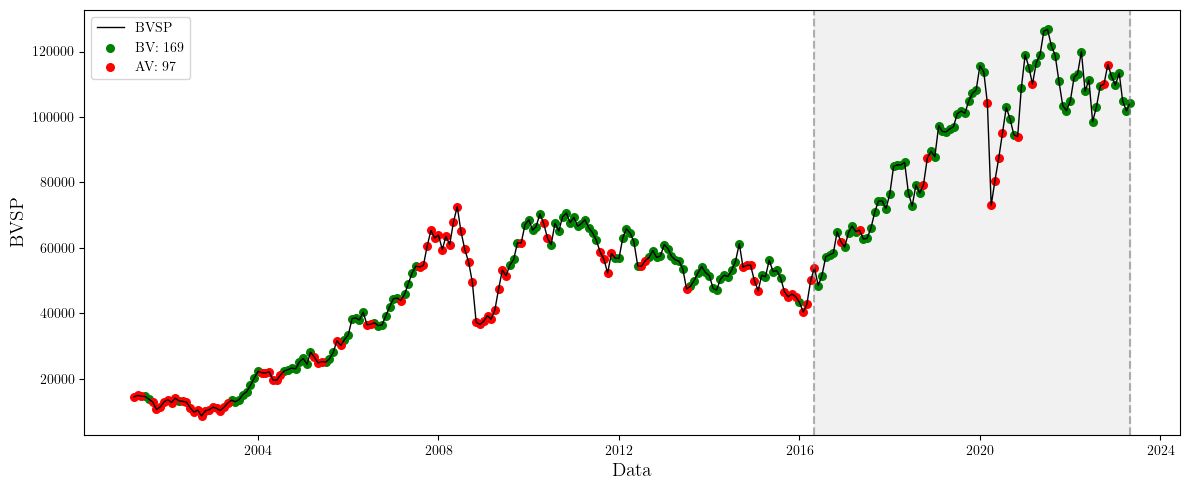

In [166]:
for df in [low_risk_data,high_risk_data,df_plot_test]:
    if isinstance(df.index, pd.PeriodIndex):
        df.index = df.index.to_timestamp()

# Plotting the risk_premium as a line
plt.figure(figsize=(12, 5))
xmin = pd.Timestamp('2016-05')  
xmax = pd.Timestamp('2023-05')  
plt.gca().axvspan(xmin, xmax, color='lightgrey', alpha=0.3)
plt.plot(df_plot_test.index, df_plot_test['bvsp'], 'black', label='BVSP',linewidth=1)  # blue line for risk premium
plt.axvline(pd.Timestamp('2016-05'), color='grey', linestyle='--', alpha=0.6)
plt.axvline(pd.Timestamp('2023-05'), color='grey', linestyle='--', alpha=0.6)
# Adding scatter plots for the risk classifications
plt.scatter(low_risk_data.index, low_risk_data['bvsp'], color='green', label=f'BV: {i_c_low.value_counts()[1]}', s=30)  # green dots for low risk
plt.scatter(high_risk_data.index, high_risk_data['bvsp'], color='r', label=f'AV: {i_c_low.value_counts()[0]}', s=30)  # red dots for high risk

for label in plt.gca().get_xticklabels():
    label.set_fontproperties(font['family'])

# Set font properties for y-axis tick labels
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(font['family'])


# plt.title('Risk Premium Over Time', fondict=font)
plt.xlabel('Data', fontdict=font)
plt.ylabel('BVSP', fontdict=font)
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig('latex2/bvsp_vol_xline.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [154]:
low_risk_data

,risk_premium,bvsp,low_risk
date,,,
2001-07-01,-0.007956,14579.30,1
2001-08-01,-0.059207,13757.49,1
2002-04-01,-0.059340,13253.00,1
2003-06-01,0.066594,13441.01,1
2003-07-01,-0.038335,12967.27,1
...,...,...,...
2023-01-01,-0.026910,109733.88,1
2023-02-01,0.031172,113429.60,1
2023-03-01,-0.077412,104933.17,1


In [155]:
df_plot_test_oos = df_plot_test.iloc[len(df_plot_test)-len(df_daily_m_oos):]
df_plot_test_oos = df_plot_test_oos.to_period('M')

In [156]:
df_plot_test_oos

,risk_premium,bvsp,low_risk
date,,,
2016-05,0.074477,53909.53,0
2016-06,-0.103477,48468.19,1
2016-07,0.060840,51540.21,1
2016-08,0.109390,57309.23,1
2016-09,0.007792,57901.45,1
...,...,...,...
2023-01,-0.026910,109733.88,1
2023-02,0.031172,113429.60,1
2023-03,-0.077412,104933.17,1


In [157]:
df_reclassified_low_risk_data_oos = pd.DataFrame(reclassified_ic_low_oss)
df_reclassified_low_risk_data_oos['bvsp'] = df_plot_test_oos['bvsp']
df_reclassified_low_risk_data_oos = df_reclassified_low_risk_data_oos[df_reclassified_low_risk_data_oos.loc[:,'class_low'] == 1]

In [158]:
df_reclassified_low_risk_data_oos.head()

,class_low,bvsp
date,,
2016-07,1,51540.21
2016-08,1,57309.23
2016-09,1,57901.45
2016-10,1,58370.15
2017-01,1,60227.28


In [159]:
df_reclassified_high_risk_data_oos = pd.DataFrame(reclassified_ic_low_oss)
df_reclassified_high_risk_data_oos['bvsp'] = df_plot_test_oos['bvsp']
df_reclassified_high_risk_data_oos = df_reclassified_high_risk_data_oos[df_reclassified_high_risk_data_oos.loc[:,'class_low'] == 0]

In [160]:
df_reclassified_high_risk_data_oos.head()

,class_low,bvsp
date,,
2016-05,0,53909.53
2016-06,0,48468.19
2016-11,0,64921.91
2016-12,0,61906.35
2017-05,0,65404.05


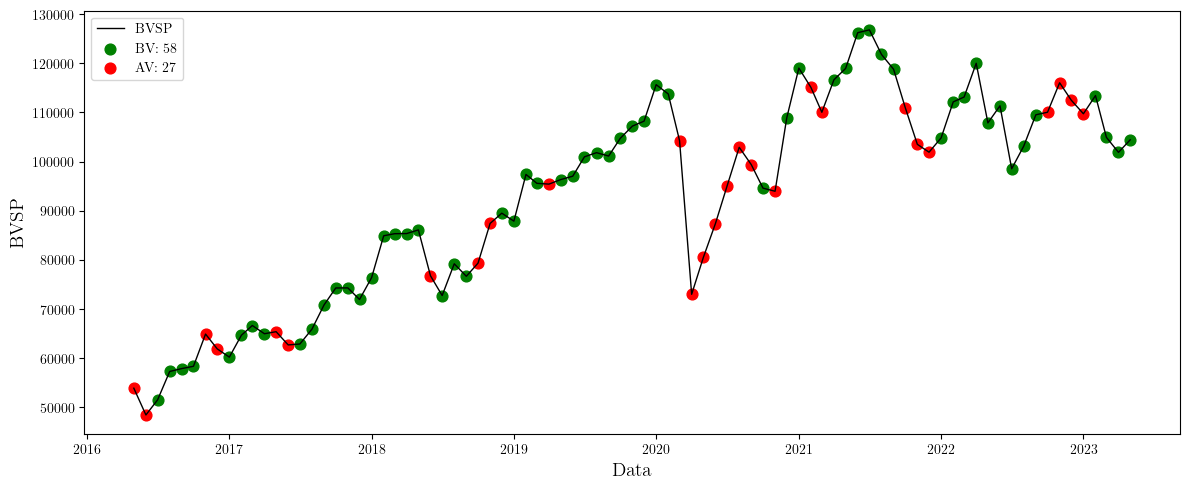

In [167]:
for df in [df_plot_test_oos,df_reclassified_low_risk_data_oos,df_reclassified_high_risk_data_oos]:
    if isinstance(df.index, pd.PeriodIndex):
        df.index = df.index.to_timestamp()

# Plotting the risk_premium as a line
plt.figure(figsize=(12, 5))
# xmin = pd.Timestamp('2016-05')  
# xmax = pd.Timestamp('2023-05')  
plt.plot(df_plot_test_oos.index, df_plot_test_oos['bvsp'], 'black', label='BVSP',linewidth=1)  # blue line for risk premium
# Adding scatter plots for the risk classifications
plt.scatter(df_reclassified_low_risk_data_oos.index, df_reclassified_low_risk_data_oos['bvsp'], color='green', label=f'BV: {df_reclassified_low_risk_data_oos.class_low.value_counts()[1]}', s=60)  # green dots for low risk
plt.scatter(df_reclassified_high_risk_data_oos.index, df_reclassified_high_risk_data_oos['bvsp'], color='r', label=f'AV: {df_reclassified_high_risk_data_oos.class_low.value_counts()[0]}', s=60)  # red dots for high risk

for label in plt.gca().get_xticklabels():
    label.set_fontproperties(font['family'])

# Set font properties for y-axis tick labels
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(font['family'])


# plt.title('Risk Premium Over Time', fondict=font)
plt.xlabel('Data', fontdict=font)
plt.ylabel('BVSP', fontdict=font)
plt.legend(loc='upper left')
plt.grid(False)
plt.tight_layout()

plt.savefig('latex2/bvsp_vol_oos.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [162]:
df_reclassified_low_risk_data_oos.class_low.value_counts()

class_low
1    58
Name: count, dtype: int64

In [163]:
df_reclassified_high_risk_data_oos.class_low.value_counts()

class_low
0    27
Name: count, dtype: int64